In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
data= pd.read_csv(r"C:\sem-3\Research\Amazon Sale Report.csv")
data.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,128975.0,NaN,NaN,NaN,64487.0,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Order ID,128975,120378,171-5057375-2831560,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,128975,91,05-03-22,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,128975,13,Shipped,77804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfilment,128975,2,Amazon,89698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Channel,128975,2,Amazon.in,128851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship-service-level,128975,2,Expedited,88615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,128975,1377,JNE3797,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,128975,7195,JNE3797-KR-L,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,128975,9,Set,50284,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [16]:
data.shape

(128975, 24)

In [17]:
data['Date']=pd.to_datetime(data['Date'])

In [18]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [19]:
null_columns = data.columns[data.isnull().any()]
print('Columns contain null values : ')
print()
for col in null_columns:
    print(col)

Columns contain null values : 

Courier Status
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
promotion-ids
fulfilled-by
Unnamed: 22


<Axes: >

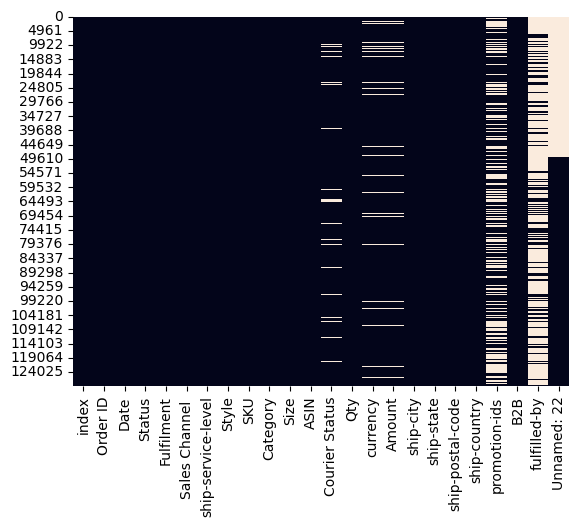

In [20]:
sns.heatmap(data.isnull(),cbar=False)


In [21]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

In [22]:
data.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [23]:
data.isna().any()

index                 False
Order ID              False
Date                  False
Status                False
Fulfilment            False
Sales Channel         False
ship-service-level    False
Style                 False
SKU                   False
Category              False
Size                  False
ASIN                  False
Courier Status        False
Qty                   False
currency              False
Amount                False
ship-city             False
ship-state            False
ship-postal-code      False
ship-country          False
promotion-ids         False
B2B                   False
fulfilled-by          False
Unnamed: 22           False
dtype: bool

In [24]:
data.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975
unique,120378,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship
freq,12,77804,89698,128851,88615,4224,773,50284,22711,773,116359,128975,11250,22293,128975,95253,128975


In [25]:
data.describe()

,index,Date,Qty,Amount,ship-postal-code
count,128975.000000,128975,128975.000000,128975.000000,128975.000000
mean,64487.000000,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32243.500000,2022-04-20 00:00:00,1.000000,459.000000,382421.000000
50%,64487.000000,2022-05-10 00:00:00,1.000000,635.000000,500033.000000
75%,96730.500000,2022-06-04 00:00:00,1.000000,771.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37232.019822,NaN,0.313354,272.581240,191452.267223


In [26]:
data.duplicated().any()

False

In [27]:
data.duplicated().sum()

0

In [28]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

<Axes: >

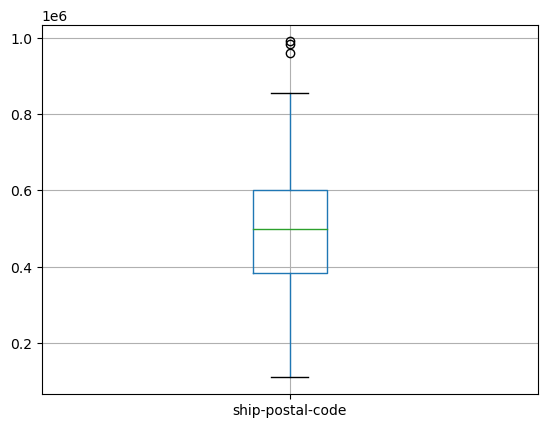

In [30]:
data[['ship-postal-code']].boxplot()

<Axes: >

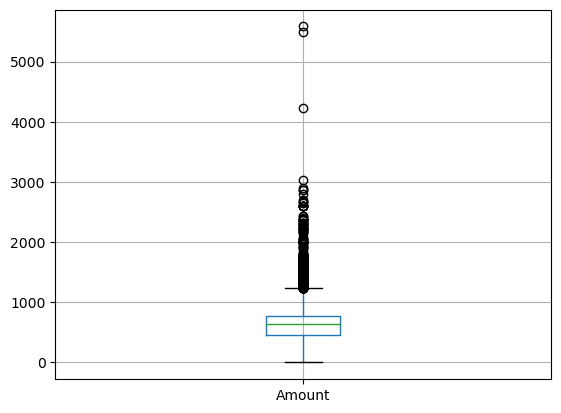

In [31]:
data[['Amount']].boxplot()


In [32]:
List=['Amount','ship-postal-code']

for col in List:
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    
    # Calculate IQR
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = data[data[col] >= lower_bound]
    filtered_data = filtered_data[filtered_data[col] <= upper_bound]

    data = filtered_data.copy()  
    

<Axes: >

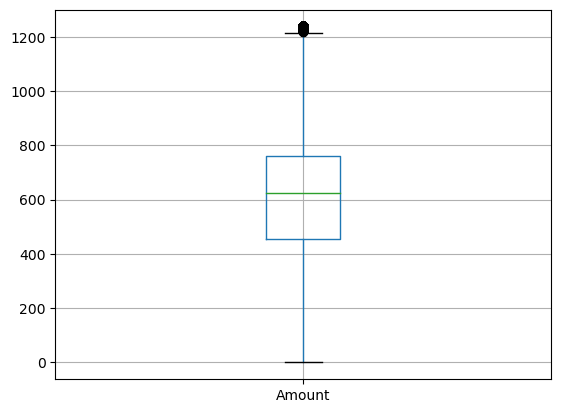

In [27]:
data[['Amount']].boxplot()

<Axes: >

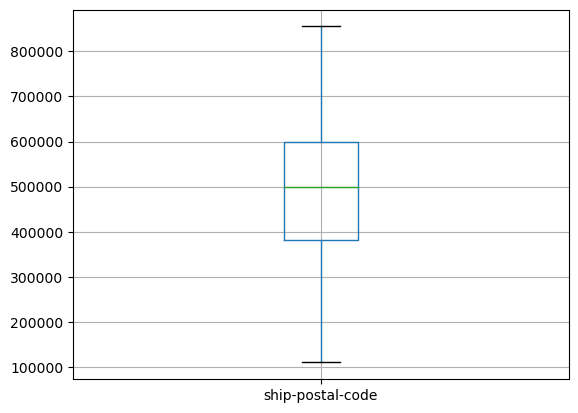

In [33]:
data[['ship-postal-code']].boxplot()

In [34]:
for col in data.columns :
    print('_'*40)
    print(col)
    print(data[col].value_counts())

________________________________________
index
index
0         1
85787     1
85815     1
85814     1
85813     1
         ..
42582     1
42581     1
42580     1
42579     1
128974    1
Name: count, Length: 124795, dtype: int64
________________________________________
Order ID
Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    10
406-9002076-4152331     9
                       ..
406-0975705-5196325     1
171-6043646-0613904     1
406-5459885-5691529     1
402-9389630-0499511     1
408-7436540-8728312     1
Name: count, Length: 116639, dtype: int64
________________________________________
Date
Date
2022-05-02    2041
2022-05-03    2028
2022-05-04    1942
2022-04-14    1843
2022-04-15    1820
              ... 
2022-05-21    1046
2022-06-25     984
2022-06-24     973
2022-06-29     633
2022-03-31     168
Name: count, Length: 91, dtype: int64
________________________________________
Status
Status
Shipped                          

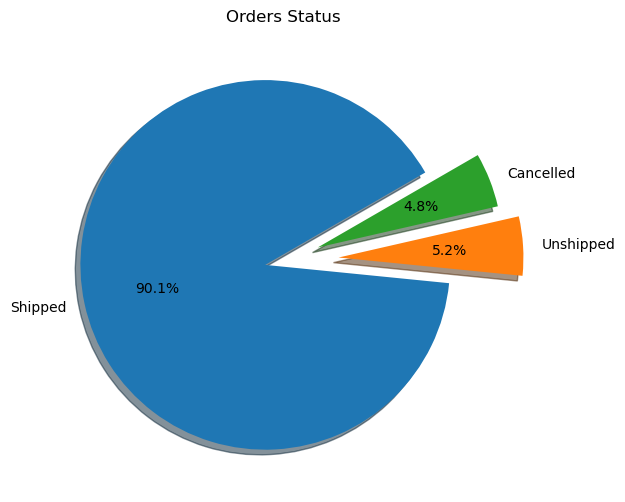

In [30]:
Status_count = data['Courier Status'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(Status_count, labels=Status_count.index, autopct='%1.1f%%', 
        startangle=30,explode=(0.1,0.3,0.2),shadow=True)

plt.title('Orders Status')
plt.show()


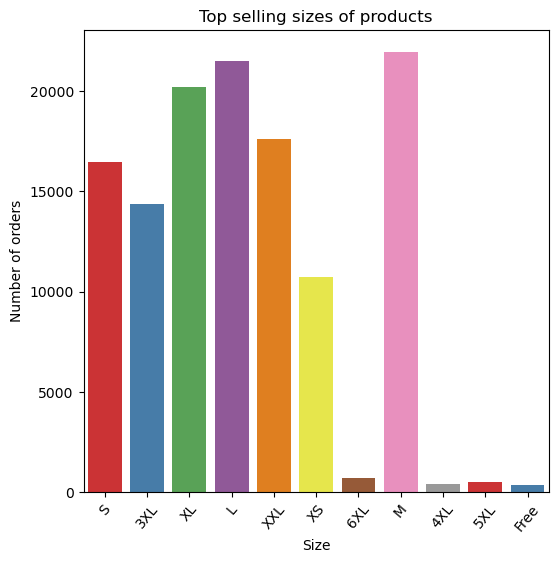

In [35]:
plt.figure(figsize=(6, 6))
sns.countplot(x=data['Size'],data=data,palette='Set1')

plt.xlabel('Size')
plt.ylabel('Number of orders')
plt.title('Top selling sizes of products')
plt.xticks(rotation=50)

plt.show()

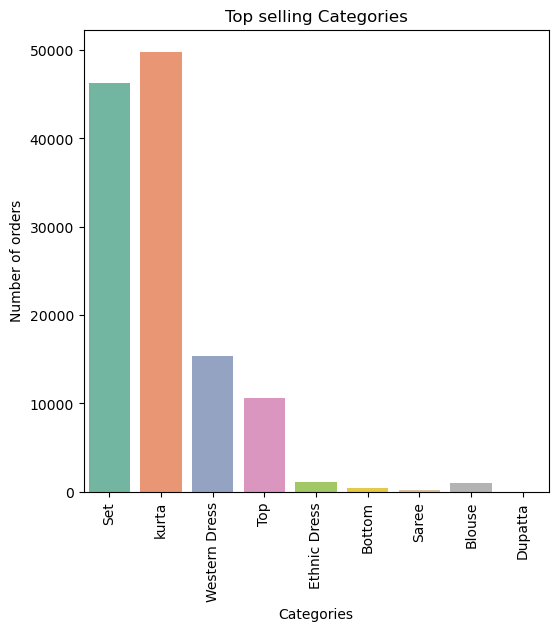

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(x=data['Category'],data=data,palette='Set2')

plt.xlabel('Categories')
plt.ylabel('Number of orders')
plt.title('Top selling Categories')
plt.xticks(rotation=90)

plt.show()

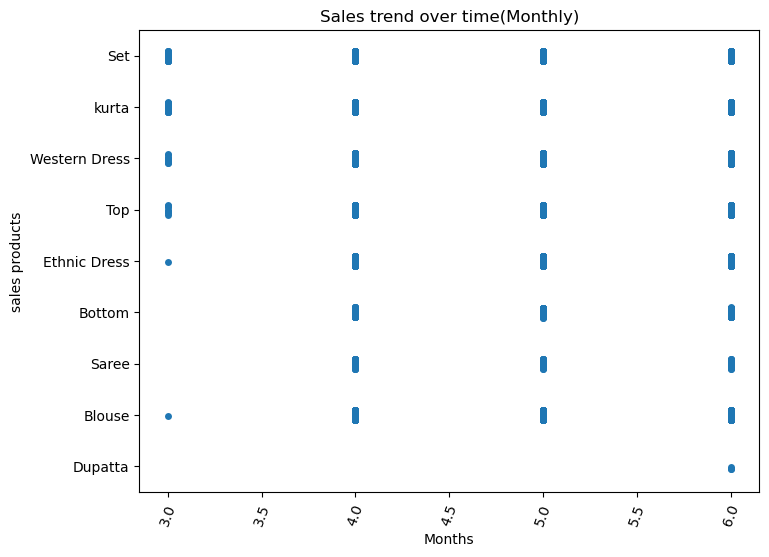

In [37]:
data['Month'] = data['Date'].dt.month

plt.figure(figsize=(8, 6))
x=sns.stripplot(x='Month', y='Category', data=data)
plt.xticks(rotation=70)

plt.xlabel('Months')
plt.ylabel('sales products')
plt.title('Sales trend over time(Monthly)')

plt.show()

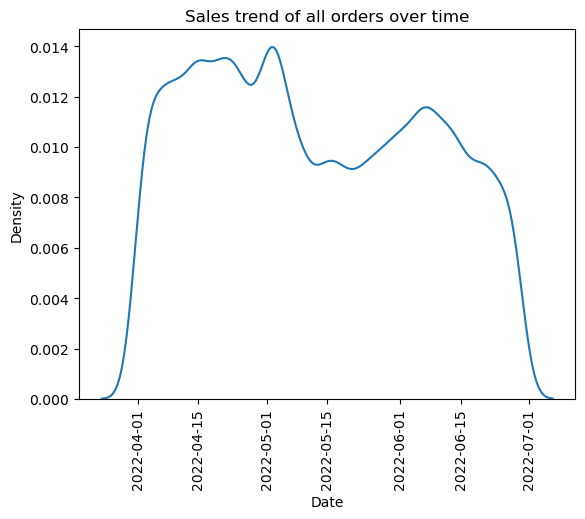

In [38]:
sns.kdeplot(data=data,x="Date")
plt.xticks(rotation=90)
plt.title('Sales trend of all orders over time')
plt.show()

In [39]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'Month'],
      dtype='object')

In [40]:
data1 = data.copy()

In [41]:
B2B_map = { False : 0 , True : 1 }
category_map = {'Shipped': 1, 'Unshipped': 0 , 'Cancelled' : -1}
Fulfilment_map = { 'Amazon' : 1 ,'Merchant' : 0 }
ship_service_level_map = { 'Expedited' : 1 , 'Standard' : 0}




data1['Courier Status'] = data['Courier Status'].map(category_map)
data1['B2B']=data['B2B'].map(B2B_map)
data1['Fulfilment']=data['Fulfilment'].map(Fulfilment_map)
data1['ship-service-level']=data['ship-service-level'].map(ship_service_level_map)

In [42]:
data1.sample(n=4)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month
88888,88888,171-1516493-2887553,2022-05-02,Shipped,1,Amazon.in,1,JNE3465,JNE3465-KR-XXXL,kurta,...,486.0,FARIDABAD,HARYANA,121001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0,Easy Ship,False,5
121581,121581,405-2823427-7253935,2022-06-06,Shipped - Delivered to Buyer,0,Amazon.in,0,SET348,SET348-KR-NP-XXXL,Set,...,899.0,MANDYA,KARNATAKA,571401.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0,Easy Ship,False,6
18538,18538,171-7978149-8733908,2022-04-19,Shipped - Delivered to Buyer,0,Amazon.in,0,SET324,SET324-KR-NP-XS,Set,...,597.0,RANGAPARA,ASSAM,784101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0,Easy Ship,False,4
73213,73213,408-6180139-9596322,2022-05-12,Shipped,1,Amazon.in,0,SET278,SET278-KR-NP-S,Set,...,0.0,Etah,UTTAR PRADESH,207001.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0,Easy Ship,False,5


In [43]:
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols


['index',
 'Fulfilment',
 'ship-service-level',
 'Courier Status',
 'Qty',
 'Amount',
 'ship-postal-code',
 'B2B']

In [44]:
cols=['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B','Month']

X = data1[cols] 
Y = data1['Courier Status'] 
 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=45)

model = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)

model.fit(X_train, y_train)
#testing the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(X_test.head(4))
print('_'*50)
print("Mean Squared Error (MSE):", mse)

        Fulfilment  ship-service-level  Qty  Amount  ship-postal-code  B2B  \
88317            1                   1    1   597.0          400708.0    0   
96199            1                   1    1   999.0          574239.0    0   
119996           0                   0    1   735.0          577101.0    0   
103016           1                   1    1  1125.0          560043.0    0   

        Month  
88317       5  
96199       6  
119996      6  
103016      6  
__________________________________________________
Mean Squared Error (MSE): 0.24035418085660484


In [45]:
# Perform K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=45)  

scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
print(scores)
print('_'*30)
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")

Cross-Validation Accuracy Scores:
[0.90316118 0.8995152  0.90079731 0.90147842 0.89943507]
______________________________
Mean Cross-Validation Accuracy: 0.90


In [46]:
# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy :.2f}")
print('_'*30)
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.90
______________________________
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1194
           0       0.00      0.00      0.00      1223
           1       0.90      1.00      0.95     22542

    accuracy                           0.90     24959
   macro avg       0.30      0.33      0.32     24959
weighted avg       0.82      0.90      0.86     24959



In [47]:
cols=['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B','Month']

Y = data1['Courier Status'] 
X = data1[cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, Y)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"RF Model Accuracy: {accuracy:.2f}")
print('_'*30)

report = classification_report(y_test, predictions)
print(report)

RF Model Accuracy: 0.95
______________________________
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1786
           0       1.00      0.01      0.02      1874
           1       0.95      1.00      0.97     33779

    accuracy                           0.95     37439
   macro avg       0.98      0.67      0.67     37439
weighted avg       0.95      0.95      0.93     37439



In [48]:
# Prepare data for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Select features and target
features = ['Qty', 'ship-postal-code']
target = 'Amount'

# Drop rows with missing values in the selected columns
data1.dropna(subset=features + [target], inplace=True)

# Split the data
X = data1[features]
y = data1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 187.23571340806822
